<a href="https://colab.research.google.com/github/Deadpoets888/Pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
from torch import nn
import matplotlib.pyplot as plt # nn contains all Pytorch's building blocks for neural networks

In [3]:
#cerate known parameters
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim = 1) #We use X to represent matrix and y to represent vector
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

#Splitting data into training and test sets

Note: one of the most important concepts in ML

Generalization - ability of a ML model to perform well on data it hasn't seen before

In [5]:
#create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

Visualize the data!!!

In [31]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=5, label = "Training Data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=5, label="Testing Data")

  #Are there prediictions?
  if predictions is not None: #plot the prediction if they exist
    plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

  #show the legend
  plt.legend(prop={"size": 12})



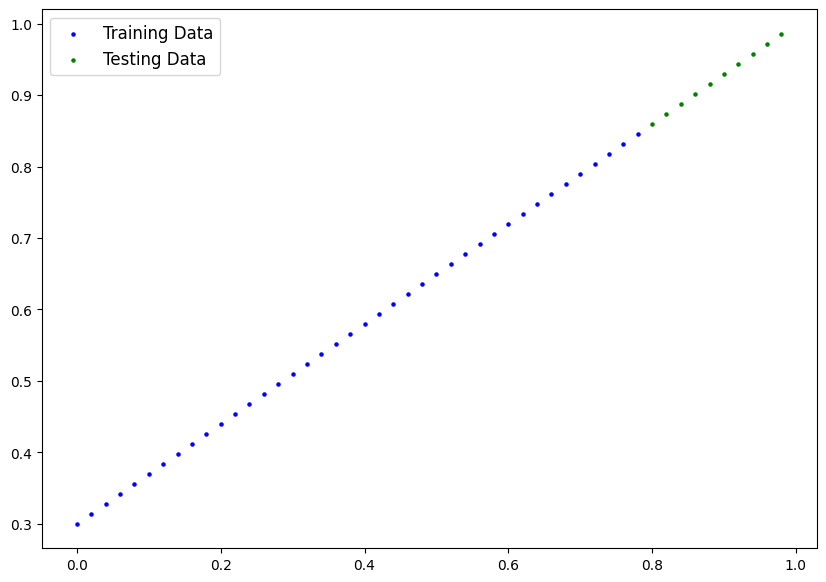

In [32]:
plot_predictions()

#Build Model

What the below model do:

-> It starts with random values(weight $ bias)

-> Look at training data and adjust the random values to better represent(or get closer to) the ideal values(the weight & and the bias values)

How does it do?

Through two main Algorithms

1.Gradient descent

2.backpropagation

In [36]:
from torch import nn

#Create linear regression model class
class LinearReggressionmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Paramters(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Paramters(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

    #Forward methos to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights* X + bias #this is linear regression formula



In [ ]:
#So, Module is part of torch.nn and is used as a base class for defining custom models in PyTorch.
# A subclass of nn.Module is any class that inherits from torch.nn.Module and extends its functionality. This is how we create custom neural network architectures in PyTorch.
#every subclass of nn.Module must override the forward method because PyTorch uses it to define how inputs flow through the network.